In [89]:
import pandas as pd
import numpy as np
import seaborn as sb

In [90]:
dados_train = pd.read_csv('dados/aug_train.csv')
dados_test = pd.read_csv('dados/aug_test.csv')

## Tratamento dos dados de Treinamento

In [91]:
dados_train.shape

(19158, 14)

In [92]:
dados_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [93]:
#analisar percentual de valores faltantes no dataset
for value in dados_train.columns:
    print(value," ",(dados_train[value].isna().sum()/len(dados_train))*100)

enrollee_id   0.0
city   0.0
city_development_index   0.0
gender   23.530639941538784
relevent_experience   0.0
enrolled_university   2.0148240943731075
education_level   2.401085708320284
major_discipline   14.68316108153252
experience   0.33928385008873574
company_size   30.994884643490973
company_type   32.04927445453596
last_new_job   2.207954901346696
training_hours   0.0
target   0.0


In [94]:
#remoção da coluna id, pois como ids são identificadores, não serão utilizados na análise
dados_train.drop(['enrollee_id'],axis = 1,inplace= True)

In [108]:
'''Identificamos em algumas variáveis alguns atributos que estão fora do padrão ou que possuem 
informação a mais, tendo isso será feito um replace dessas informações'''

dados_train['city'] = dados_train['city'].replace('city_',"", regex=True)
dados_train['experience'] = dados_train['experience'].replace(['>20','<1'],[21,0], regex=True)
dados_train['last_new_job'] = dados_train['last_new_job'].replace(['>4','never'],[5,0],regex=True)

print(dados_train['city'].value_counts(),
      dados_train['experience'].value_counts(),
      dados_train['last_new_job'].value_counts())

103    3048
21     1781
16     1092
114    1003
160     543
       ... 
107       2
139       1
109       1
171       1
180       1
Name: city, Length: 119, dtype: int64 21    2328
5      918
6      851
4      812
10     758
3      730
9      728
7      704
8      590
2      556
15     548
11     504
14     467
16     395
12     391
13     315
17     260
1      250
19     230
18     214
0      213
20     103
Name: experience, dtype: int64 1    5802
5    2519
2    2246
4     819
3     817
0     662
Name: last_new_job, dtype: int64


In [98]:
dados_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [99]:
# Analise IV e woe para as variáveis categóricas em relação a variável target
for i in dados_train.drop(columns = ['target',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
  
    df_woe_iv = (pd.crosstab(dados_train[i], dados_train['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

In [100]:
# Analisando o IV iremos excluir as variáveis 'major_discipline' e 'gender'
# pois possuem uma relação muito fraca com a variável target

dados_train.drop(['major_discipline','gender'],axis = 1,inplace=True)
dados_train.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Has relevent experience,no_enrollment,Graduate,21,NaN,NaN,1,36,1.0
1,40,0.776,No relevent experience,no_enrollment,Graduate,15,50-99,Pvt Ltd,5,47,0.0
2,21,0.624,No relevent experience,Full time course,Graduate,5,NaN,NaN,0,83,0.0
3,115,0.789,No relevent experience,NaN,Graduate,0,NaN,Pvt Ltd,0,52,1.0
4,162,0.767,Has relevent experience,no_enrollment,Masters,21,50-99,Funded Startup,4,8,0.0


<AxesSubplot:>

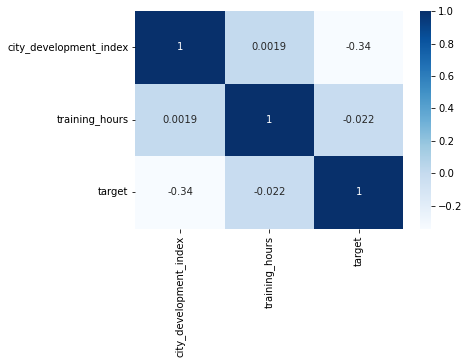

In [101]:
# Analise de correlação das variáveis numéricas em relação a variável target
corr = dados_train.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [102]:
# devido a uma baixa relação com a variável target a variável 'city_development_index'
# será removida do nosso dataset

dados_train.drop(['city_development_index'],axis=1,inplace=True)
dados_train.head()

,city,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,103,Has relevent experience,no_enrollment,Graduate,21,NaN,NaN,1,36,1.0
1,40,No relevent experience,no_enrollment,Graduate,15,50-99,Pvt Ltd,5,47,0.0
2,21,No relevent experience,Full time course,Graduate,5,NaN,NaN,0,83,0.0
3,115,No relevent experience,NaN,Graduate,0,NaN,Pvt Ltd,0,52,1.0
4,162,Has relevent experience,no_enrollment,Masters,21,50-99,Funded Startup,4,8,0.0


In [103]:
# imputação de valores nas variáveis 'education_level', 'enrolled_university' e 'company_type'
dados_train['company_type'].replace(np.nan,'Other',regex=True,inplace=True)

dados_train['education_level'] = np.where(((dados_train['enrolled_university'] == 'Full time course')
                                          | (dados_train['enrolled_university'] == 'Part time course')
                                          & (dados_train['education_level'] == np.nan)),
                                         'High School',dados_train['education_level'])

dados_train['enrolled_university'] = np.where(((dados_train['education_level'] == 'Primary School') &
                                               (dados_train['enrolled_university'] == np.nan)),
                                               'no_enrollment',dados_train['education_level'])

#Imputação do valor 'Other' no lugar de NaN no atributo company_size
dados_train['company_size'] = np.where(dados_train['company_size'] == np.nan,'Other',
                                       dados_train['company_size'])

# Como os valores NaN das demais variáveis não chegam a 5% do valor total iremos remover os registros
dados_train.dropna(inplace=True)

In [105]:
#analisar percentual de valores faltantes no dataset
for value in dados_train.columns:
    print(value," ",(dados_train[value].isna().sum()/len(dados_train))*100)

city   0.0
relevent_experience   0.0
enrolled_university   0.0
education_level   0.0
experience   0.0
company_size   0.0
company_type   0.0
last_new_job   0.0
training_hours   0.0
target   0.0


In [106]:
# Padronização dos dados da variável 'company_size'
dados_train['company_size'] = dados_train['company_size'].replace(['10/49','<10'],
                                                                  ['10-49','1-10'],regex=True)
dados_train['company_size'].value_counts()

50-99        2996
100-500      2514
10000+       1981
10-49        1416
1000-4999    1295
1-10         1263
500-999       853
5000-9999     547
Name: company_size, dtype: int64